In [1]:
import pandas as pd 
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold


# single model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Ensemble Learning
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# feature selection

In [2]:
data = pd.read_csv('Data_DropOut(ไม่ลงทะเบียน,ไม่ชำระ).csv', index_col=0)
data.head()

,STATUSTEXT,GPA,ENTRYGPA,FATHERINCOME,YEARFATHER,MOTHERINCOME,YEARMOTHER,บุตรคนที่,จำนวนพี่น้อง,COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE LABORATORY_F,...,COURSE_GRADE_ENGLISH FOR COMMUNICATION_F,COURSE_GRADE_ENGLISH I_F,COURSE_GRADE_GENERAL MATHEMATICS_F,COURSE_GRADE_GENERAL PHYSICS LABORATORY I_F,COURSE_GRADE_HAPPINESS OF LIFE_F,COURSE_GRADE_INTRODUCTION TO INFORMATION AND COMMUNICATION TECHNOLOGY_F,COURSE_GRADE_MULTICULTURALISM_F,COURSE_GRADE_OPERATIONS RESEARCH_F,COURSE_GRADE_STATISTICAL ANALYSIS I_F,COURSE_GRADE_STATISTICAL INFORMATION PROJECT II_F
0,1,2.74,3.65,20000.0,59.0,15000.0,54.0,1.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.60,3.38,10000.0,43.0,9000.0,37.0,1.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2.44,3.82,30000.0,49.0,30000.0,48.0,3.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2.29,3.16,53080.0,59.0,47660.0,54.0,3.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3.23,3.56,27000.0,58.0,10000.0,50.0,2.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.dropna(inplace=True)

In [4]:
data.shape

(500, 27)

In [5]:
data.rename(columns={"บุตรคนที่": "NumberOfSon", "จำนวนพี่น้อง": "NumberOfSiblings"}, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 516
Data columns (total 27 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   STATUSTEXT                                                               500 non-null    int64  
 1   GPA                                                                      500 non-null    float64
 2   ENTRYGPA                                                                 500 non-null    float64
 3   FATHERINCOME                                                             500 non-null    float64
 4   YEARFATHER                                                               500 non-null    float64
 5   MOTHERINCOME                                                             500 non-null    float64
 6   YEARMOTHER                                                               5

In [8]:
X = data.drop('STATUSTEXT' , axis = 1)
y = data['STATUSTEXT']

# oversampling

In [9]:
print(Counter(y))

Counter({0: 469, 1: 31})


In [10]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [11]:
X_over, y_over = oversample.fit_resample(X, y)

In [12]:
print(Counter(y_over))

Counter({1: 469, 0: 469})


# scaling

In [13]:
scaler = MinMaxScaler()

In [14]:
#X[np.array(X.columns)] = scaler.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y , random_state = 123)


In [15]:
X_over[np.array(X_over.columns)] = scaler.fit_transform(X_over)

# train test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, stratify=y_over , random_state = 123)


# single model

In [17]:
rt = RandomForestClassifier(random_state=123)
dt = DecisionTreeClassifier(random_state=123)
svm = SVC(probability=True,random_state=123)

In [18]:
# turning model
# parameter model 

param_grid_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}



param_grid_rt = {'max_depth': [3, 5, 10, 20, 30],
                 'criterion' :['gini', 'entropy'],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': [2, 5, 10]}



param_grid_dt = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# optimize paremeter
clf_1 = GridSearchCV(rt,param_grid_rt, cv=cv , refit=True )
clf_2 = GridSearchCV(dt,param_grid_dt , cv=cv , refit=True)
clf_3 = GridSearchCV(svm,param_grid_svm , cv=cv , refit=True)

## DecisionTreeClassifier

In [19]:
clf_2.fit(X_train , y_train)
y_pred_acc = clf_2.predict(X_test)
print('Best parameters' ,clf_2.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'criterion': 'gini', 'max_depth': 18, 'max_features': 8, 'min_samples_leaf': 2}
[[92  2]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        94
           1       0.98      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [20]:
pred_prob2 = clf_2.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
auc_clf_2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_clf_2

0.9940583974649162

## SVM

In [21]:
clf_3.fit(X_train , y_train)
y_pred_acc = clf_3.predict(X_test)
print('Best parameters' ,clf_3.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
[[87  7]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        94
           1       0.93      1.00      0.96        94

    accuracy                           0.96       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.96      0.96       188

-----------------------------------------------------


In [22]:
pred_prob3 = clf_3.predict_proba(X_test )
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
auc_clf_3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_clf_3

0.9894748755092803

## ROC single model

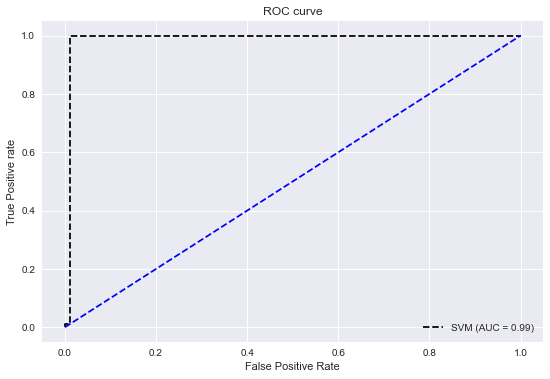

In [23]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr1, tpr1, linestyle='--',color='black', label='RT (AUC = %0.2f)' % auc_clf_1)
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DT (AUC = %0.2f)' % auc_clf_2)
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='SVM (AUC = %0.2f)' % auc_clf_3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Ensemble Model

## Bagging

### Bagging (DT base model)

In [24]:
n_estimators = [10, 100, 1000]
grid = dict(n_estimators=n_estimators)

In [25]:
clf_bagging1 = BaggingClassifier(base_estimator=clf_2.best_estimator_, n_estimators=10, oob_score=True ,random_state=123)
clf_bagging1.fit(X_train, y_train)
y_pred_acc = clf_bagging1.predict(X_test)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

[[93  1]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [26]:
pred_prob4 = clf_bagging1.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
auc_clf_bagging1 = roc_auc_score(y_test, pred_prob4[:,1])
auc_clf_bagging1

1.0

### Bagging (SVM base model)

In [27]:
clf_bagging2 = BaggingClassifier(base_estimator=clf_3.best_estimator_, n_estimators=10, oob_score=True,random_state=123)
clf_bagging2.fit(X_train, y_train)
y_pred_acc = clf_bagging2.predict(X_test)

print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

[[87  7]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        94
           1       0.93      1.00      0.96        94

    accuracy                           0.96       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.96      0.96       188

-----------------------------------------------------


In [28]:
pred_prob5 = clf_bagging2.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
auc_clf_bagging2 = roc_auc_score(y_test, pred_prob5[:,1])
auc_clf_bagging2

0.9805341783612495

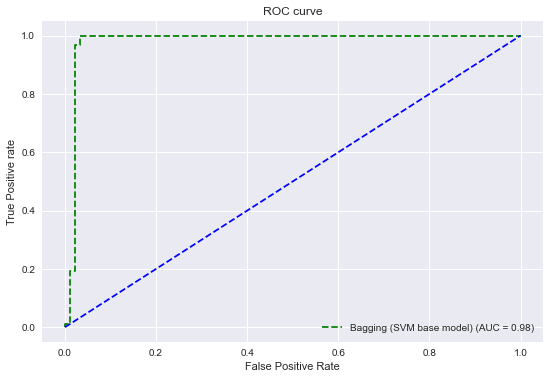

In [29]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='Bagging (DT base model) (AUC = %0.2f)' % auc_clf_bagging1)
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='Bagging (SVM base model) (AUC = %0.2f)' % auc_clf_bagging2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Boosting

### Boosting (DT base model)

In [30]:
model= AdaBoostClassifier(base_estimator= clf_2.best_estimator_ , algorithm="SAMME" ,random_state=2)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

y_pred_acc = grid_result.predict(X_test)


In [31]:
print('Best parameters' ,grid_result.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'learning_rate': 1.0, 'n_estimators': 100}
[[93  1]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [32]:
pred_prob6 = grid_result.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
auc_clf_boosting1 = roc_auc_score(y_test, pred_prob5[:,1])
auc_clf_boosting1

0.9805341783612495

In [33]:
grid_search.best_estimator_.feature_importances_

array([2.40115977e-01,            nan, 9.78250064e-02, 1.41192143e-01,
       1.07812855e-01, 7.28280502e-02,            nan, 3.73646548e-02,
       1.28672184e-02, 1.42005071e-02, 1.48464301e-02, 1.77180750e-03,
       2.58227024e-02, 2.74325388e-02, 9.71597572e-03, 1.11296819e-04,
       1.60954056e-03, 1.77672706e-04, 3.00452700e-03, 3.08439098e-02,
       2.46900662e-03, 1.02327823e-02, 1.37219927e-04, 1.34521797e-02,
       2.61579269e-02, 2.93965785e-03])

### Boosting (SVM base model)

In [34]:
model1 = AdaBoostClassifier(base_estimator= clf_3.best_estimator_ , algorithm="SAMME" ,random_state=123)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
y_pred_acc = grid_result.predict(X_test)


In [35]:
print('Best parameters' ,grid_result.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'learning_rate': 1.0, 'n_estimators': 50}
[[89  5]
 [ 9 85]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        94
           1       0.94      0.90      0.92        94

    accuracy                           0.93       188
   macro avg       0.93      0.93      0.93       188
weighted avg       0.93      0.93      0.93       188

-----------------------------------------------------


In [36]:
pred_prob7 = grid_result.predict_proba(X_test)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
auc_clf_boosting2 = roc_auc_score(y_test, pred_prob7[:,1])
auc_clf_boosting2

0.9883431416930738

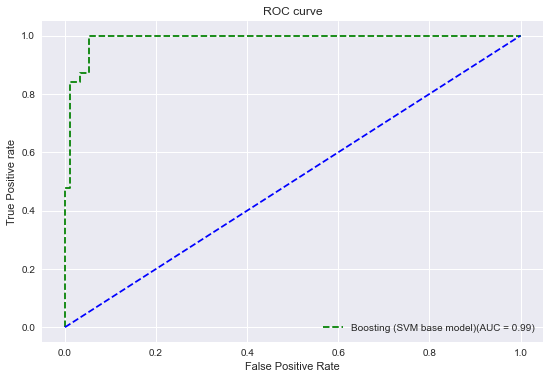

In [37]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Boosting (DT base model) (AUC = %0.2f)' % auc_clf_boosting1)
plt.plot(fpr7, tpr7, linestyle='--',color='green', label='Boosting (SVM base model)(AUC = %0.2f)' % auc_clf_boosting2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## RandomForestClassifier

In [38]:
rt = RandomForestClassifier(random_state=121)
clf_1 = GridSearchCV(rt,param_grid_rt, cv=cv , refit=True )
clf_1.fit(X_train , y_train)
y_pred_acc = clf_1.predict(X_test)
print('Best parameters' ,clf_1.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2}
[[93  1]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [39]:
pred_prob1 = clf_1.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
auc_clf_1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_clf_1



1.0

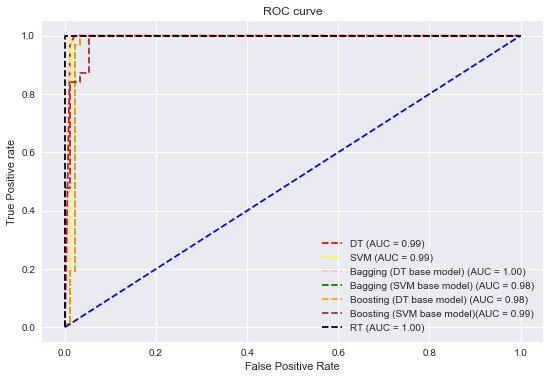

In [40]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='DT (AUC = %0.2f)' % auc_clf_2)
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='SVM (AUC = %0.2f)' % auc_clf_3)
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='Bagging (DT base model) (AUC = %0.2f)' % auc_clf_bagging1)
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='Bagging (SVM base model) (AUC = %0.2f)' % auc_clf_bagging2)
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Boosting (DT base model) (AUC = %0.2f)' % auc_clf_boosting1)
plt.plot(fpr7, tpr7, linestyle='--',color='brown', label='Boosting (SVM base model)(AUC = %0.2f)' % auc_clf_boosting2)
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='RT (AUC = %0.2f)' % auc_clf_1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [41]:
clf_1.best_estimator_.feature_importances_

array([4.41594443e-01, 8.63768909e-02, 4.37461893e-02, 5.31882102e-02,
       4.62175834e-02, 5.04604510e-02, 2.01603930e-02, 2.26162189e-02,
       2.17968982e-02, 1.86707449e-02, 2.27884895e-02, 9.07589461e-03,
       4.75531075e-02, 3.82814632e-03, 2.70221163e-03, 1.08043092e-03,
       4.48075695e-03, 6.34272681e-03, 2.40855297e-03, 2.63266776e-02,
       5.00206225e-03, 3.85322954e-02, 9.00337947e-06, 7.42036257e-03,
       1.68202147e-02, 8.01044216e-04])

In [42]:
forest_importances = pd.Series(clf_1.best_estimator_.feature_importances_, index=X_train.columns)
forest_importances.sort_values(ascending=False)

GPA                                                                        0.441594
ENTRYGPA                                                                   0.086377
YEARFATHER                                                                 0.053188
YEARMOTHER                                                                 0.050460
COURSE_GRADE_ELEMENTARY PHYSICS_F                                          0.047553
MOTHERINCOME                                                               0.046218
FATHERINCOME                                                               0.043746
COURSE_GRADE_INTRODUCTION TO INFORMATION AND COMMUNICATION TECHNOLOGY_F    0.038532
COURSE_GRADE_GENERAL PHYSICS LABORATORY I_F                                0.026327
COURSE_GRADE_CALCULUS FOR PHYSICAL SCIENCE I_F                             0.022788
NumberOfSiblings                                                           0.022616
COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE LABORATORY_F                     0

<AxesSubplot:>

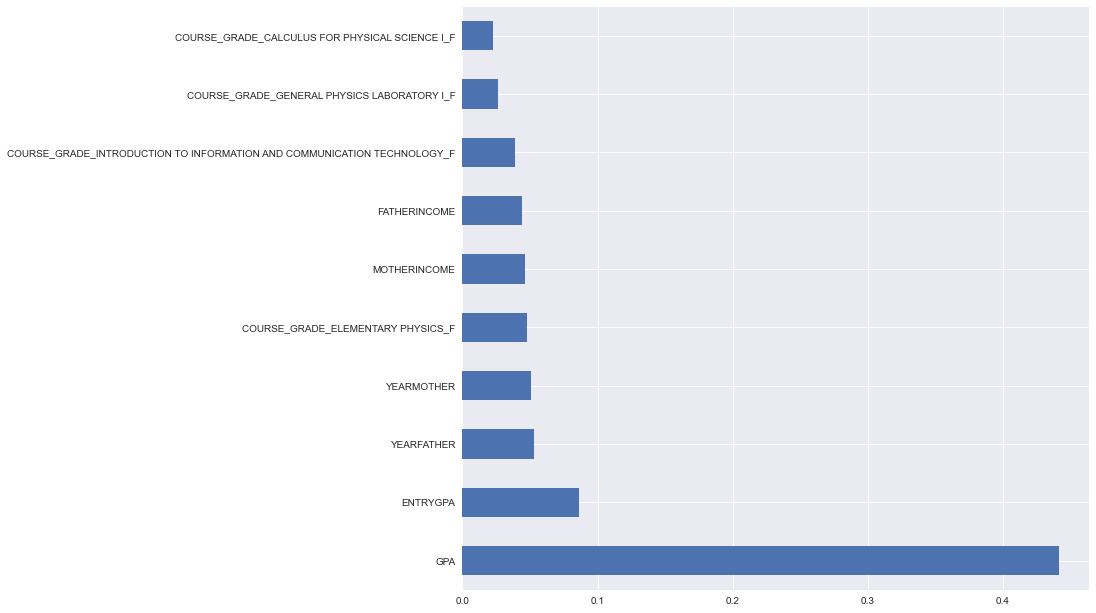

In [43]:
plt.subplots(figsize=(10,10))
forest_importances.sort_values(ascending=False).nlargest(10).plot.barh()

In [44]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

In [45]:
data_fea = forest_importances[forest_importances.values > 0.01]
data_fea=data_fea.rename('Coefficient').reset_index().sort_values('Coefficient', ascending=False)
data_fea.to_csv(r'Feature importance case 2.csv' , encoding='utf-8-sig')
data_fea['index']

0                                                   GPA
1                                              ENTRYGPA
3                                            YEARFATHER
5                                            YEARMOTHER
11                    COURSE_GRADE_ELEMENTARY PHYSICS_F
4                                          MOTHERINCOME
2                                          FATHERINCOME
13    COURSE_GRADE_INTRODUCTION TO INFORMATION AND C...
12          COURSE_GRADE_GENERAL PHYSICS LABORATORY I_F
10       COURSE_GRADE_CALCULUS FOR PHYSICAL SCIENCE I_F
7                                      NumberOfSiblings
8     COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE LABO...
6                                           NumberOfSon
9           COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE_F
14                COURSE_GRADE_STATISTICAL ANALYSIS I_F
Name: index, dtype: object

In [46]:
data_asd = pd.DataFrame(data_fea['index'].str.split('_', n=2,expand=True ))
data_asd[data_asd[0] != 'COURSE'][0].values

indices = data_asd[data_asd[0] != 'COURSE'][0].index
data_asd.loc[indices, 2] = data_asd[data_asd[0] != 'COURSE'][0].values

data_fea['Feature'] = data_asd[2]
data_fea

,index,Coefficient,Feature
0,GPA,0.441594,GPA
1,ENTRYGPA,0.086377,ENTRYGPA
3,YEARFATHER,0.053188,YEARFATHER
5,YEARMOTHER,0.050460,YEARMOTHER
11,COURSE_GRADE_ELEMENTARY PHYSICS_F,0.047553,ELEMENTARY PHYSICS_F
...,...,...,...
7,NumberOfSiblings,0.022616,NumberOfSiblings
8,COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE LABORATORY_F,0.021797,BIOLOGY FOR PHYSICAL SCIENCE LABORATORY_F
6,NumberOfSon,0.020160,NumberOfSon
9,COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE_F,0.018671,BIOLOGY FOR PHYSICAL SCIENCE_F


In [49]:
fig = px.bar(data_fea, x='Coefficient', y='Feature', text='Coefficient',  
             barmode='group', opacity=0.75)
fig.update_traces(texttemplate='%{text:,.3f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

fig.update_layout(title_text='feature importance (ไม่ลงทะเบียน,ไม่ชำระ)', font_color='#28221D',
                  yaxis_title='Feature')
fig.show()

In [55]:
data_2564 = pd.read_csv('Data_2564_DropOut(ไม่ลงทะเบียน,ไม่ชำระ).csv', index_col=0)
data_2564.rename(columns={"บุตรคนที่": "NumberOfSon", "จำนวนพี่น้อง": "NumberOfSiblings"}, inplace=True)
data_2564.head()

,STATUSTEXT,GPA,ENTRYGPA,FATHERINCOME,YEARFATHER,MOTHERINCOME,YEARMOTHER,NumberOfSon,NumberOfSiblings,COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE LABORATORY_F,...,COURSE_GRADE_ENGLISH FOR COMMUNICATION_F,COURSE_GRADE_ENGLISH I_F,COURSE_GRADE_GENERAL MATHEMATICS_F,COURSE_GRADE_GENERAL PHYSICS LABORATORY I_F,COURSE_GRADE_HAPPINESS OF LIFE_F,COURSE_GRADE_INTRODUCTION TO INFORMATION AND COMMUNICATION TECHNOLOGY_F,COURSE_GRADE_MULTICULTURALISM_F,COURSE_GRADE_OPERATIONS RESEARCH_F,COURSE_GRADE_STATISTICAL ANALYSIS I_F,COURSE_GRADE_STATISTICAL INFORMATION PROJECT II_F
517,0,2.63,3.62,45000.0,52.0,14000.0,52.0,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
518,0,1.95,3.23,3000.0,55.0,9000.0,54.0,2.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519,0,2.45,3.05,40000.0,51.0,40000.0,49.0,2.0,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
520,0,1.97,3.00,37210.0,46.0,22980.0,49.0,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521,0,3.24,3.50,15000.0,43.0,15000.0,43.0,2.0,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data_2564.drop('STATUSTEXT',1,inplace=True)

In [57]:
data_2564.shape

(99, 26)

In [58]:
y_pred_acc = clf_1.predict(data_2564)
#print('Best parameters' ,clf_1.best_params_)
#print(confusion_matrix(y_test,y_pred_acc))
#print(classification_report(y_test,y_pred_acc))
#print('-----------------------------------------------------')

In [59]:
y_pred_acc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
y_pred_case2 = pd.DataFrame(y_pred_acc)
y_pred_case2.to_csv(r'y_pred_case2.csv', encoding='utf-8-sig')